### Importing libraries, reading the csv file, and taking a look at the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cars = pd.read_csv("Cars.csv")

In [3]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [4]:
cars.shape

(432, 15)

### Dropping empty rows, and filling null data

In [5]:
cars.isnull()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
428,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
429,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
cars.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [7]:
cars = cars.dropna(how = "all")

In [8]:
cars["Cylinders"] = cars["Cylinders"].fillna(cars["Cylinders"].mean())

In [9]:
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

# Investigating the data

### Finding the count of each car make

In [10]:
pd.set_option("display.max_rows", 50)
cars["Make"].value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Dodge            13
Mitsubishi       13
Volvo            12
Jaguar           12
Hyundai          12
Subaru           11
Pontiac          11
Mazda            11
Lexus            11
Kia              11
Buick             9
Mercury           9
Lincoln           9
Saturn            8
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Acura             7
Porsche           7
Saab              7
Land Rover        3
Oldsmobile        3
Jeep              3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: Make, dtype: int64

### Count of each car type

In [11]:
cars["Type"].value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

### Count of each country of origin

In [12]:
cars["Origin"].value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

### Filtering the dataframe to show only rows where Origin is Asia or Europe

In [13]:
cars["Origin"].isin(["Asia", "Europe"])

0      True
1      True
2      True
3      True
4      True
       ... 
427    True
428    True
429    True
430    True
431    True
Name: Origin, Length: 428, dtype: bool

In [14]:
cars["Origin"].isin(["Asia", "Europe"]).value_counts()

True     281
False    147
Name: Origin, dtype: int64

In [15]:
cars_asia_euro = cars[cars["Origin"].isin(["Asia", "Europe"])]

### Removing all rows where Weight is above 4000

In [16]:
cars[cars["Weight"]>4000]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
15,Audi,A4 3.0 Quattro convertible 2dr,Sedan,Europe,All,"$44,240","$40,075",3.0,6.0,220.0,18.0,25.0,4013.0,105.0,180.0
17,Audi,A6 4.2 Quattro 4dr,Sedan,Europe,All,"$49,690","$44,936",4.2,8.0,300.0,17.0,24.0,4024.0,109.0,193.0
18,Audi,A8 L Quattro 4dr,Sedan,Europe,All,"$69,190","$64,740",4.2,8.0,330.0,17.0,24.0,4399.0,121.0,204.0
20,Audi,RS 6 4dr,Sports,Europe,Front,"$84,600","$76,417",4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Volkswagen,Touareg V6,SUV,Europe,All,"$35,515","$32,243",3.2,6.0,220.0,15.0,20.0,5086.0,112.0,187.0
415,Volkswagen,Phaeton 4dr,Sedan,Europe,Front,"$65,000","$59,912",4.2,8.0,335.0,16.0,22.0,5194.0,118.0,204.0
416,Volkswagen,Phaeton W12 4dr,Sedan,Europe,Front,"$75,000","$69,130",6.0,12.0,420.0,12.0,19.0,5399.0,118.0,204.0
419,Volkswagen,Passat W8,Wagon,Europe,Front,"$40,235","$36,956",4.0,8.0,270.0,18.0,25.0,4067.0,106.0,184.0


In [17]:
heavy_cars = cars[cars["Weight"]>4000]

In [18]:
non_heavy = cars[~(cars["Weight"]>4000)]

### Increasing the values of the 'MPG_City' column by 3

In [19]:
cars.head(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0


In [20]:
# Method 1
cars["MPG_City"] + 3

0      20.0
1      27.0
2      25.0
3      23.0
4      21.0
       ... 
427    24.0
428    23.0
429    22.0
430    25.0
431    23.0
Name: MPG_City, Length: 428, dtype: float64

In [21]:
# Method 2
mpg_city_plus = cars["MPG_City"].apply(lambda x:x+3)
mpg_city_plus

0      20.0
1      27.0
2      25.0
3      23.0
4      21.0
       ... 
427    24.0
428    23.0
429    22.0
430    25.0
431    23.0
Name: MPG_City, Length: 428, dtype: float64

### Looking at average pricing

In [22]:
# removing unwanted characters
cars["MSRP"] = cars["MSRP"].str.replace("$","").str.replace(",","")
cars["Invoice"] = cars["Invoice"].str.replace("$","").str.replace(",","")

C:\Users\Roberto\AppData\Local\Temp\ipykernel_22356\152403218.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars["MSRP"] = cars["MSRP"].str.replace("$","").str.replace(",","")
C:\Users\Roberto\AppData\Local\Temp\ipykernel_22356\152403218.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars["Invoice"] = cars["Invoice"].str.replace("$","").str.replace(",","")


In [23]:
cars.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


In [24]:
# converting to float
cars["MSRP"] = cars["MSRP"].astype(float)
cars["Invoice"] = cars["Invoice"].astype(float)

In [25]:
cars["MSRP"].mean().round(2)

32774.86

In [26]:
cars["Invoice"].mean().round(2)

30014.7

In [27]:
cars["Invoice"].median()

25294.5

In [28]:
# average pricing by Make
cars.groupby(["Make"])["MSRP","Invoice"].mean().round(2)

C:\Users\Roberto\AppData\Local\Temp\ipykernel_22356\1006095789.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cars.groupby(["Make"])["MSRP","Invoice"].mean().round(2)


,MSRP,Invoice
Make,,
Acura,42938.57,38590.86
Audi,43307.89,39330.11
BMW,43285.25,39620.65
Buick,30537.78,27854.89
Cadillac,50474.38,46426.88
Chevrolet,26587.04,24060.81
Chrysler,27252.00,25270.07
Dodge,26253.85,24160.08
Ford,24015.87,21953.00


In [29]:
# average pricing by Type
cars.groupby(["Type"])["MSRP","Invoice"].mean().round(2)

C:\Users\Roberto\AppData\Local\Temp\ipykernel_22356\618258465.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cars.groupby(["Type"])["MSRP","Invoice"].mean().round(2)


,MSRP,Invoice
Type,,
Hybrid,19920.00,18429.33
SUV,34790.25,31625.35
Sedan,29773.62,27389.80
Sports,53387.06,48473.16
Truck,24941.38,22616.75
Wagon,28840.53,26645.63


# Visualising the data

In [30]:
cars.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


[Text(0.5, 1.0, 'Count of each Car Type')]

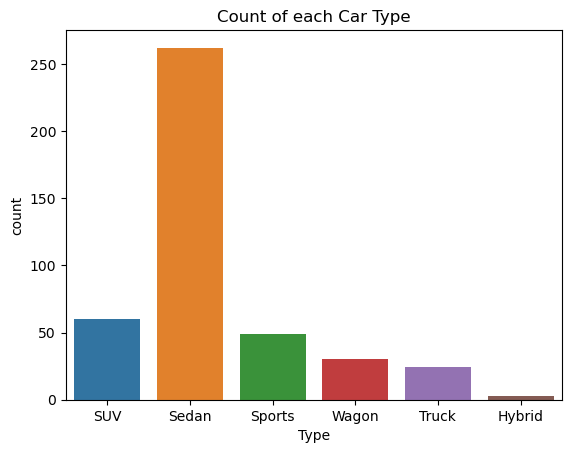

In [31]:
sns.countplot(data = cars, x = "Type").set(title = "Count of each Car Type")

[Text(0.5, 1.0, 'Count of each Car Make')]

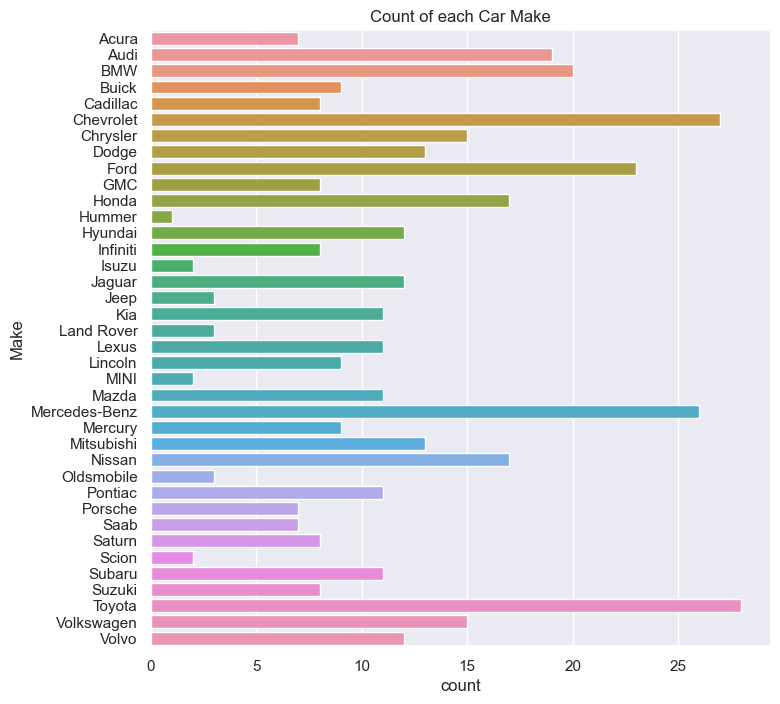

In [32]:
sns.set(rc={"figure.figsize":(8,8)})
sns.countplot(data = cars, y = "Make").set(title = "Count of each Car Make")

[Text(0.5, 1.0, 'Relationship between Weight and Invoice Price')]

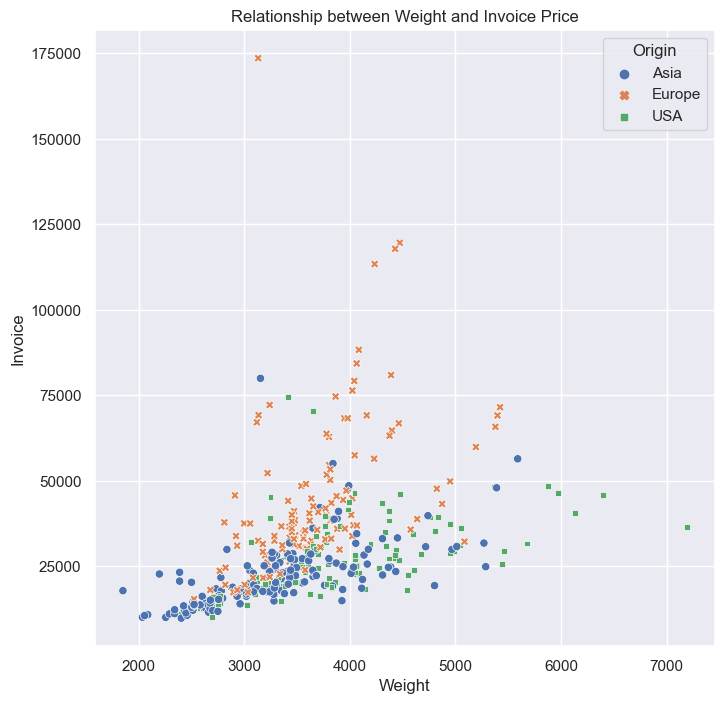

In [33]:
sns.scatterplot(data = cars, x = "Weight", y = "Invoice", hue = "Origin", style = "Origin").set(
title = "Relationship between Weight and Invoice Price")

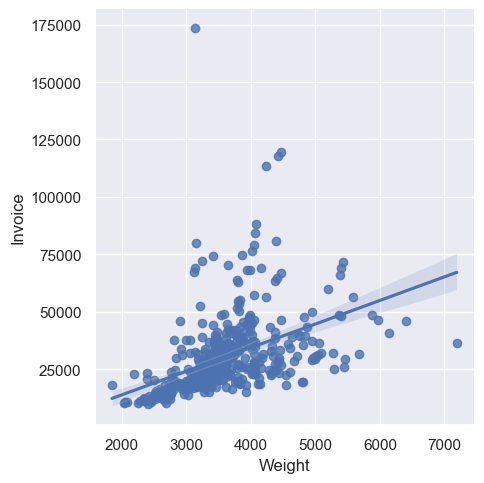

In [34]:
sns.lmplot(data = cars, x = "Weight", y = "Invoice")

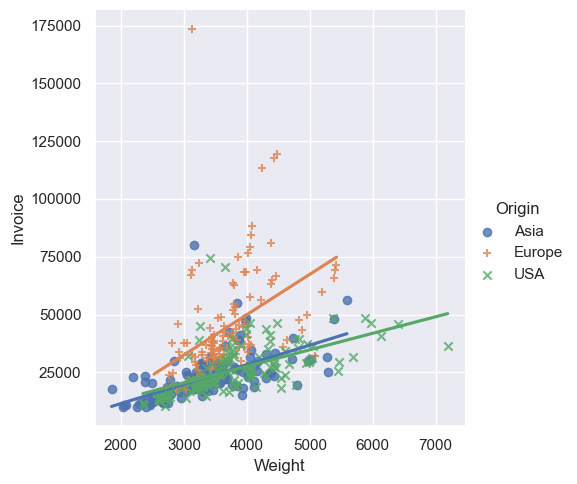

In [35]:
sns.lmplot(data = cars, x = "Weight", y = "Invoice", hue = "Origin", markers = ["o", "+", "x"], ci=None)

[Text(0.5, 1.0, 'Mean Invoice Price by Origin')]

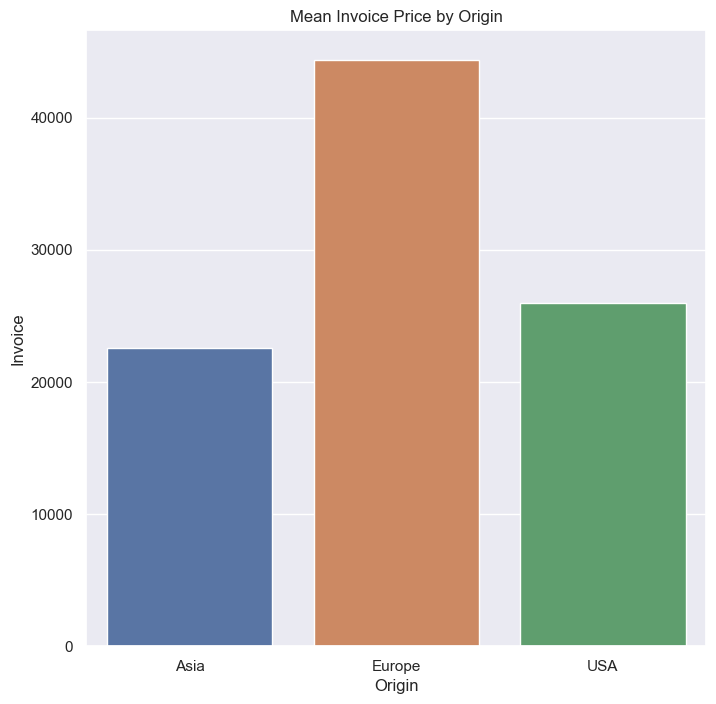

In [36]:
sns.barplot(x="Origin", y="Invoice", data=cars, estimator=np.mean, errorbar=None).set(title="Mean Invoice Price by Origin")

In [37]:
cars.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


[Text(0.5, 1.0, 'Distribution of Car Invoice Price')]

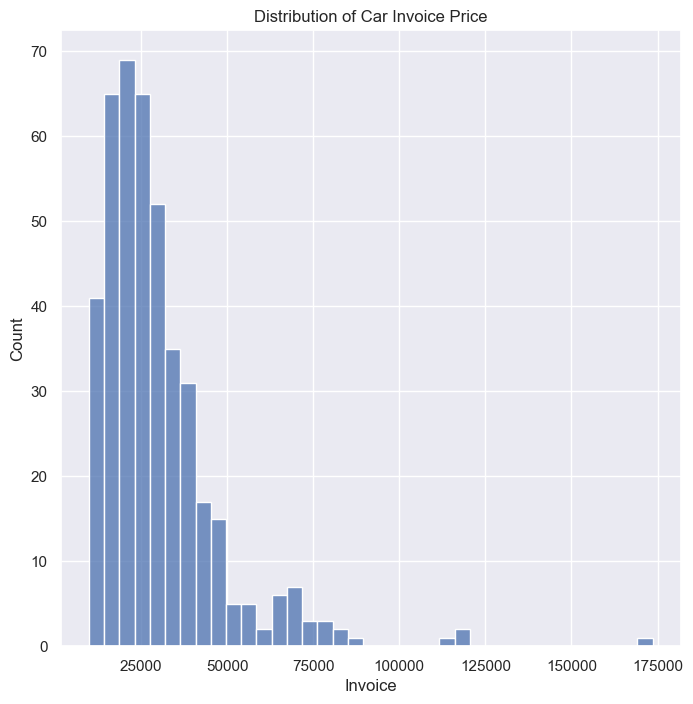

In [38]:
sns.histplot(data=cars, x="Invoice").set(title="Distribution of Car Invoice Price")

[Text(0.5, 1.0, 'Distribution of Invoice Price by Car Type')]

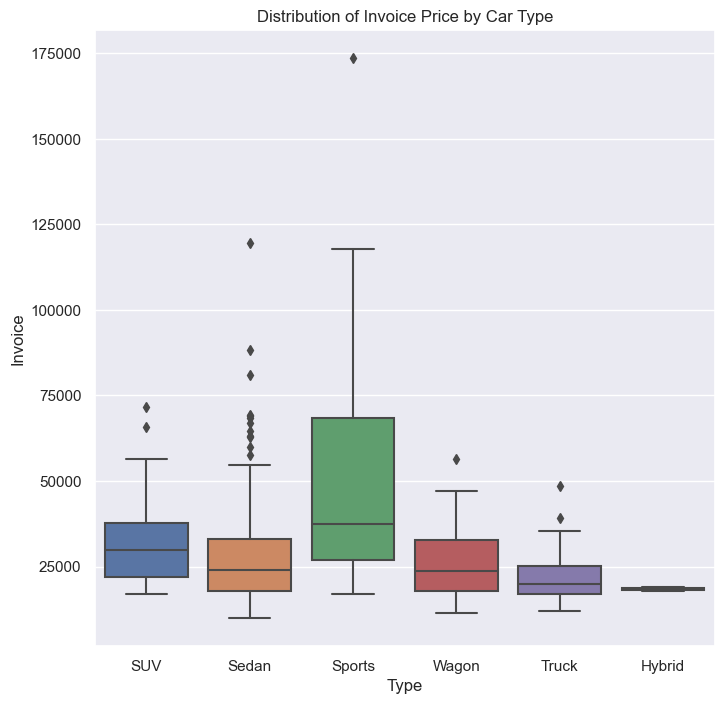

In [39]:
sns.boxplot(data=cars, x="Type", y="Invoice").set(title="Distribution of Invoice Price by Car Type")

[Text(0.5, 1.0, 'Distribution of Invoice Price by Car Make')]

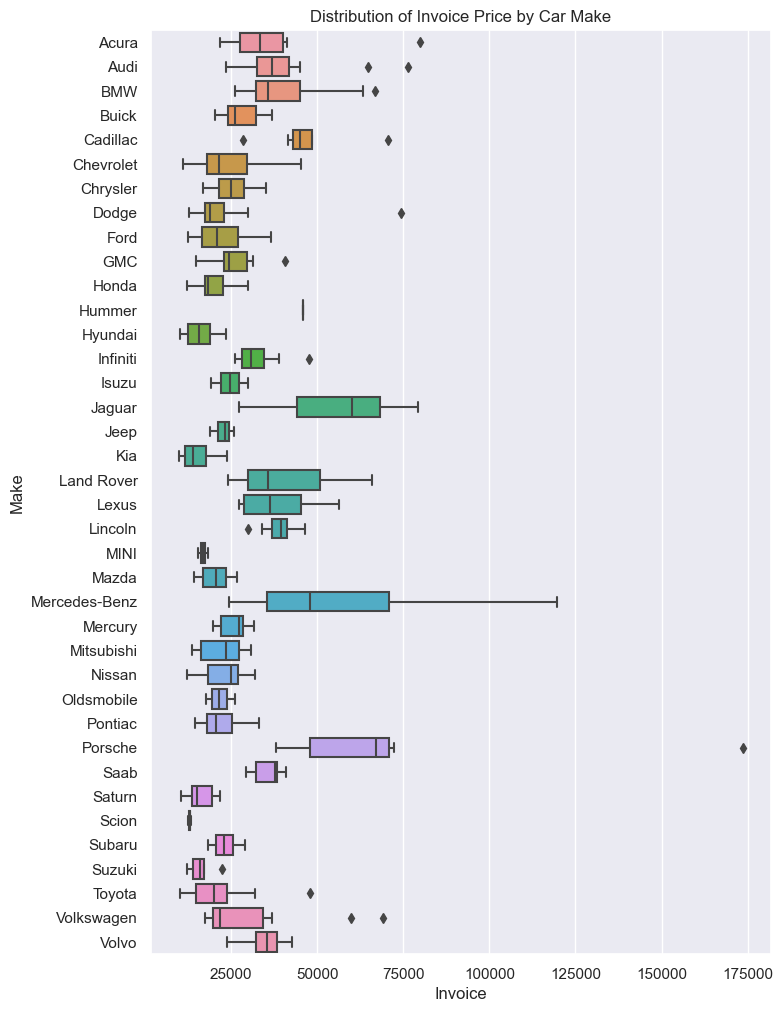

In [40]:
sns.set(rc={"figure.figsize":(8,12)})
sns.boxplot(data=cars, x="Invoice", y="Make").set(title="Distribution of Invoice Price by Car Make")